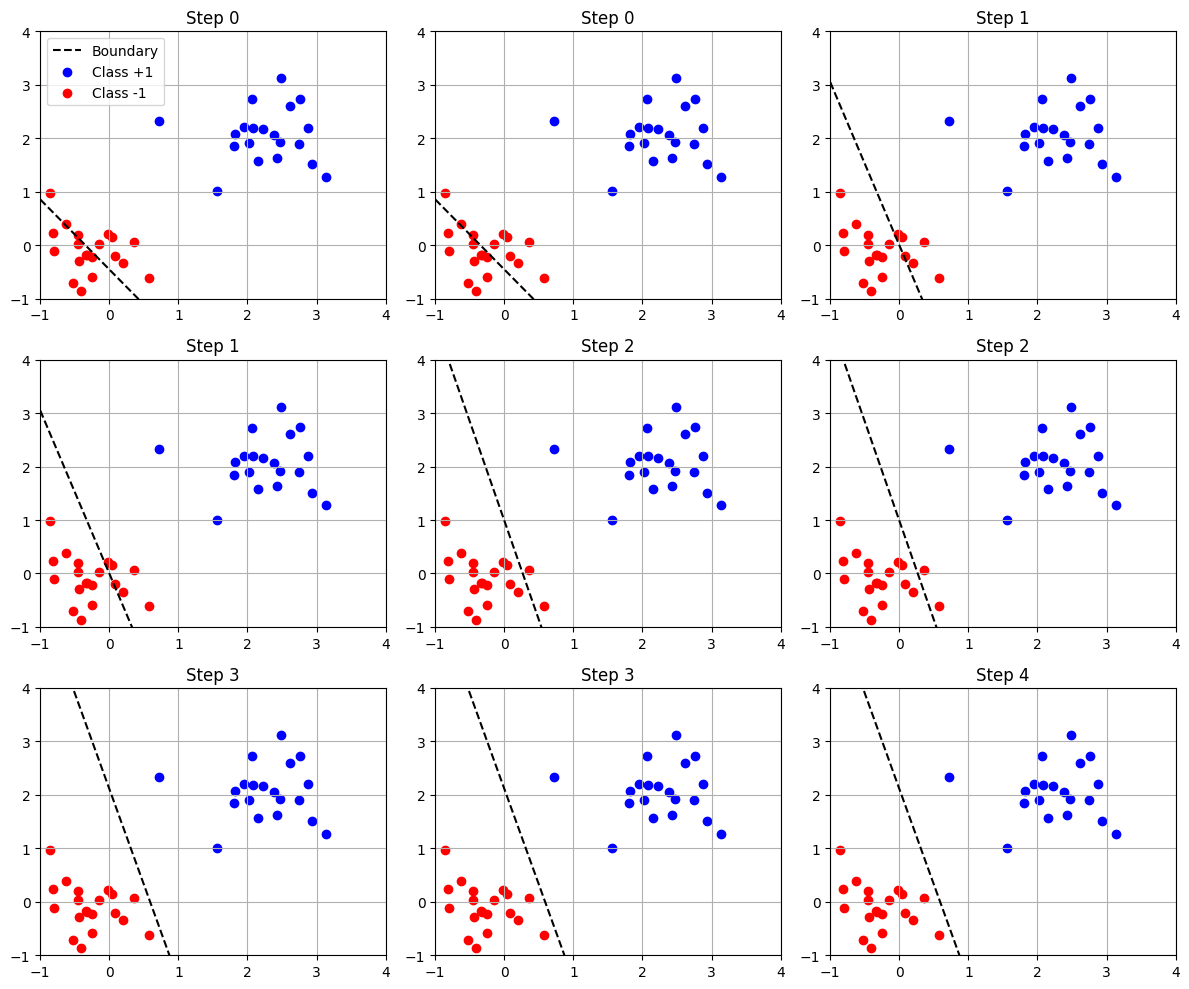

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Linearly separable but not too easy
def load_custom_data():
    np.random.seed(0)
    X_pos = np.random.randn(20, 2) * 0.5 + [2, 2]
    X_neg = np.random.randn(20, 2) * 0.5 + [0, 0]
    X = np.vstack((X_pos, X_neg))
    y = np.hstack((np.ones(20), -np.ones(20)))
    return X, y

# Perceptron training with history tracking
def train_perceptron(X, y, lr=0.1, epochs=100):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias
    w = np.zeros(X_bias.shape[1])
    history = []

    for epoch in range(epochs):
        for xi, target in zip(X_bias, y):
            prediction = np.sign(np.dot(w, xi))
            if prediction != target:
                w += lr * target * xi
                history.append(w.copy())  # Save after update
        if np.array_equal(np.sign(X_bias @ w), y):
            history.append(w.copy())
            return history
    return history

# Plot decision boundary progression
def plot_progress(X, y, weights_history, num_steps=9):
    total = len(weights_history)
    indices = np.linspace(0, total - 1, num_steps, dtype=int)

    fig, axes = plt.subplots(3, 3, figsize=(12, 10))
    axes = axes.ravel()

    for i, idx in enumerate(indices):
        w = weights_history[idx]
        ax = axes[i]
        x_vals = np.linspace(-1, 4, 100)
        if w[2] != 0:
            y_vals = -(w[1] * x_vals + w[0]) / w[2]
            ax.plot(x_vals, y_vals, 'k--', label='Boundary')
        ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
        ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
        ax.set_xlim(-1, 4)
        ax.set_ylim(-1, 4)
        ax.set_title(f"Step {idx}")
        ax.grid(True)
        if i == 0:
            ax.legend()
    plt.tight_layout()
    plt.show()

# Run
X, y = load_custom_data()
history = train_perceptron(X, y)
plot_progress(X, y, history, num_steps=9)
